In [ ]:

# General libraries
import pandas as pd
import numpy as np

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

# 4.0 Time Series - Group 1 - PAXGUSDT

The following code is based on Group 0 - OG, especially BTCUSDT. Due to time constraints, we will use the original name btc_df and btc_daily or any dataframe name as btc_* rather than correcting name of each crypto. 

However, the acutal data is from the correct group as we will extract the representative crypto for each group

In [ ]:
# Load the dataset
combined_1H_clean = pd.read_pickle('1H_combined_clean.pkl')

# Extract only BTC data
btc_df = combined_1H_clean[combined_1H_clean['symbol'] == 'PAXGUSDT']

# Set index is the Close time
btc_df = btc_df.set_index('Close time')

display(btc_df)

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,symbol
Close time,,,,,,,,,,,
2020-08-28 13:00:00,2020-08-28 12:00:00,1945.95,1999.00,1945.95,1972.0,19.173093,37799.36,146,11.232281,22206.60,PAXGUSDT
2020-08-28 14:00:00,2020-08-28 13:00:00,1972.01,2049.69,1950.00,1962.0,48.161804,94965.33,354,21.050860,41353.56,PAXGUSDT
2020-08-28 15:00:00,2020-08-28 14:00:00,1950.21,1975.00,1950.21,1975.0,6.448603,12725.12,62,1.811795,3578.11,PAXGUSDT
2020-08-28 16:00:00,2020-08-28 15:00:00,1974.07,1991.00,1964.05,1980.0,6.597893,13058.28,69,3.464033,6857.83,PAXGUSDT
2020-08-28 17:00:00,2020-08-28 16:00:00,1980.00,1990.00,1974.06,1983.0,4.089618,8121.62,51,1.246819,2478.10,PAXGUSDT
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-10 19:00:00,2022-12-10 18:00:00,1787.00,1790.00,1787.00,1789.0,13.278200,23745.04,134,7.886000,14105.86,PAXGUSDT
2022-12-10 20:00:00,2022-12-10 19:00:00,1789.00,1792.00,1789.00,1791.0,39.221100,70217.35,257,17.240600,30874.16,PAXGUSDT
2022-12-10 21:00:00,2022-12-10 20:00:00,1792.00,1793.00,1791.00,1791.0,5.843800,10472.96,42,5.506100,9868.10,PAXGUSDT


In [ ]:
# Get shape
btc_df.shape

(20008, 11)

### Checking for missing dates or null values

In [ ]:
first_day = btc_df.index.min()
last_day = btc_df.index.max()

# pandas `Timestamp` objects
first_day, last_day

(Timestamp('2020-08-28 13:00:00'), Timestamp('2022-12-10 23:00:00'))

In [ ]:
# Time delta for BTCUSDT
last_day - first_day

Timedelta('834 days 10:00:00')

In [ ]:
#looks at the actual number of dates that exist for this time period
full_range = pd.date_range(start=first_day, end=last_day, freq="D")

#looks at and compares the actual number of dates to the number of dates in my dataset. 
full_range.difference(btc_df.index)

#Return a set that contains the items that only exist in set x, and not in set y

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [ ]:
btc_df.isna().sum()

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
symbol                          0
dtype: int64

In [ ]:
btc_df[btc_df.isna().any(axis=1)]

# .any: Return whether any element is True, potentially over an axis.
#With axis=1 it produces a sum for each row.

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,symbol
Close time,,,,,,,,,,,


### Exploring the time series

In [ ]:
# the "D" option specifies Daily
btc_daily = btc_df.resample("D").mean()

btc_daily.head()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
Close time,,,,,,,,,
2020-08-28,1972.148182,1990.695455,1962.927273,1975.169091,9.259179,18273.146364,79.363636,4.049277,7984.904545
2020-08-29,1972.672083,1977.117083,1965.118333,1971.633333,6.374853,12545.726250,40.666667,3.703749,7300.230417
2020-08-30,1972.168333,1976.206250,1967.804167,1972.790417,12.500232,24614.662083,54.208333,7.783799,15317.320833
2020-08-31,1975.522500,1978.611667,1970.691667,1974.850417,5.133065,10131.753333,38.541667,2.822646,5573.343333
2020-09-01,1986.647917,1991.545417,1980.777083,1987.139583,8.496439,16913.018333,64.083333,4.381629,8735.312917


In [ ]:
fig = px.line(btc_daily, x=btc_daily.index, y="Close",)
fig.update_layout(
    yaxis_title="Price in USDT", 
    xaxis_title="Year",
    legend_title="", 
    title="BTCUSDT Price"
)
fig.show()

#### Price change - Daily from Previous Day

In [ ]:
# the "MS" option specifies dailyfrequency by Start day
btc_daily= btc_df[["Close"]].resample("D").mean()
#btc_daily= btc_df["Close"][btc_df.index > "2022-01-01"].resample("D").mean()

# relative deviation from the overall mean
hourly_mean_diff = btc_daily.pct_change()

# Plot the change 
fig = px.bar(hourly_mean_diff)

fig.update_layout(
    yaxis_title="Percentage Change", 
    yaxis_tickformat = '%',
    xaxis_title="Time",
    title="hourly deviation from Previous Hour Close (%)",
    showlegend=False,
)
fig.show()


#### Trend-Seasonal Decomposition

In [ ]:
# decompose the time series
decomposition = tsa.seasonal_decompose(btc_daily, model='additive')

# add the decomposition data

btc_daily["Trend"] = decomposition.trend
btc_daily["Seasonal"] = decomposition.seasonal
btc_daily["Residual"] = decomposition.resid

btc_daily

,Close,Trend,Seasonal,Residual
Close time,,,,
2020-08-28,1975.169091,NaN,-0.419473,NaN
2020-08-29,1971.633333,NaN,0.808258,NaN
2020-08-30,1972.790417,NaN,2.103251,NaN
2020-08-31,1974.850417,1969.956596,0.644114,4.249706
2020-09-01,1987.139583,1965.731548,-0.497707,21.905742
...,...,...,...,...
2022-12-06,1777.125000,1785.422619,-0.497707,-7.799912
2022-12-07,1779.583333,1786.607143,-2.039719,-4.984090
2022-12-08,1786.333333,NaN,-0.598725,NaN


In [ ]:
# daily DECOMPOSITION

cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=btc_daily.index, y=btc_daily[col]),
        row=i+1,
        col=1
    )

fig.update_layout(
    height=800, 
    width=1200, 
    showlegend=False,
    title='Trend-Seasonal Decomposition of BTCUSDT')
fig.show()

We can make a few observations immediately:
- The trend is clearly upward, we can observe a long period where revenue plateaued 1987-1992 followed by a steady (linear) increase.
- The seasonal plot shows exactly what we observed using our bar plot for monthly differences.

- We can see that the residual still shows some seasonality. In general, it would be ideal to have that information captured by the seasonal component. We also see some  heteroscedasticity (changing variance) in the residual component. There are more advanced decomposition techniques that can account for such affects and extract a changing seasonal component.

### Forcasting 

#### Performing Various Differencing in a Time Series 

https://towardsdatascience.com/an-intuitive-guide-to-differencing-time-series-in-python-1d6c7a2c067a

SARIMA model not SARIMAX
compute the differences between consecutive observations. This is known as differencing.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality.

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

In [ ]:
# diff(30) compares compare the difference between 30 days apart 
btc_daily["seasonal_difference"] = btc_daily["Close"].diff(30)
btc_daily

,Close,Trend,Seasonal,Residual,seasonal_difference
Close time,,,,,
2020-08-28,1975.169091,NaN,-0.419473,NaN,NaN
2020-08-29,1971.633333,NaN,0.808258,NaN,NaN
2020-08-30,1972.790417,NaN,2.103251,NaN,NaN
2020-08-31,1974.850417,1969.956596,0.644114,4.249706,NaN
2020-09-01,1987.139583,1965.731548,-0.497707,21.905742,NaN
...,...,...,...,...,...
2022-12-06,1777.125000,1785.422619,-0.497707,-7.799912,105.041667
2022-12-07,1779.583333,1786.607143,-2.039719,-4.984090,112.416667
2022-12-08,1786.333333,NaN,-0.598725,NaN,109.833333


In [ ]:

fig = px.line(btc_daily, x=btc_daily.index, y="seasonal_difference")
fig.update_layout(
    yaxis_title="Difference ($)", 
    xaxis_title="Date",
    title="Change in Close Price over The Previous Day of BTC"
)
fig.show()

Now, apart from the last year, it looks like we got stationary data:
- there is no clear trend in the new series, 
- the variance is relatively constant, and
- there is no seasonality but some multiyear cycles can be clearly spotted (a _cyclical pattern_ is characterized by rises and falls of uneven frequency). Note that this corresponds to the fast vs slow growth periods that we observed initially.

Our forecasting work will be based on predicting this differenced series instead of the original one.

**Note**: the original revenue series can be restored by using the first 12-month of revenue values and the seasonal differences by recursively adding the differences to the so-far restored values. We will do this once our forecast is ready.

### Augmented Dickey-Fuller Test

Check for stationary in the time series

Null Hypothesis: The data is not stationary.

Alternative Hypothesis: The data is stationary.

For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

1. p-value <= significance level (0.01, 0.05, 0.10, etc.)
2. If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

the p-values = 0 <0.05, thus the data is stationary

In [ ]:
# We need to make a temp dataframe to do the ADF test.
btc_daily2 = btc_daily.drop(btc_daily.index[:30]) # drop the NAN value to run AdFuller test
btc_daily2

,Close,Trend,Seasonal,Residual,seasonal_difference
Close time,,,,,
2020-09-27,1872.041667,1881.512857,2.103251,-11.574442,-103.127424
2020-09-28,1877.402083,1886.900893,0.644114,-10.142924,-94.231250
2020-09-29,1899.683750,1892.842738,-0.497707,7.338719,-73.106667
2020-09-30,1901.585417,1898.590595,-2.039719,5.034541,-73.265000
2020-10-01,1910.687917,1904.609524,-0.598725,6.677118,-76.451667
...,...,...,...,...,...
2022-12-06,1777.125000,1785.422619,-0.497707,-7.799912,105.041667
2022-12-07,1779.583333,1786.607143,-2.039719,-4.984090,112.416667
2022-12-08,1786.333333,NaN,-0.598725,NaN,109.833333


In [ ]:
# https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
#Augmented Dickey–Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(btc_daily2['seasonal_difference'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -4.484468
p-value                          0.000210
#Lags Used                       3.000000
Number of Observations Used    801.000000
Critical Value (1%)             -3.438540
Critical Value (5%)             -2.865155
Critical Value (10%)            -2.568695
dtype: float64


### Autocorrelation and finding the order $p$ for AR models

_Autocorrelation plots_ help determine if the successive elements of a time series are positively correlated, negatively correlated, or independent of each other. Analysing the autocorrelations is a key step in finding the right parameters for (autoregressive) time series models.

When looking at correlation, we usually think of correlation between two variables like height and weight. With time series data, when looking at autocorrelation, we are calculating the correlation between the time series elements and the corresponding elements that were observed a certain time period earlier.  That time period is called the _lag_. 

As an example, the autocorrelation with lag 3 is the correlation between the revenue that were observed in a certain month and revenue prices that were recorded 3 month prior, as shown in the plot below. The plot below shows a clear positive correlation:

Autocorrelation analysis measures the relationship of the observations between the different points in time, and thus seeks for a pattern or trend over the time series. For example, the temperatures on different days in a month are autocorrelated.

Autocorrelation is a correlation coefficient. However, instead of correlation between two different variables, the correlation is between two values of the same variable at times Xi and Xi+k.

We can look at autocorrelations generated with different lags which gives the so-called _autocorrelation function_. Looking at the original revenue first, the seasonality of the data is clearly visible in the autocorrelation plot as well:

https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b

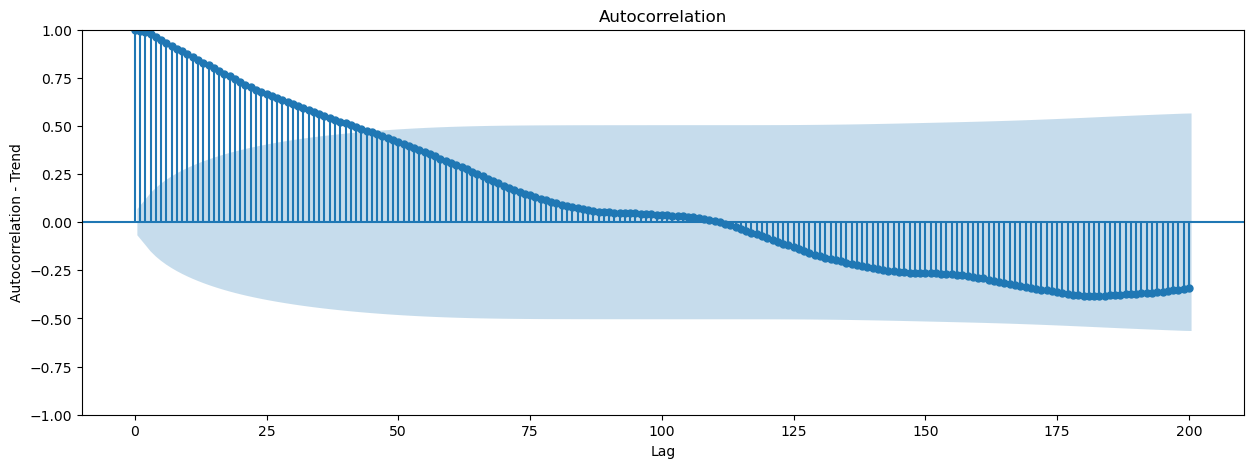

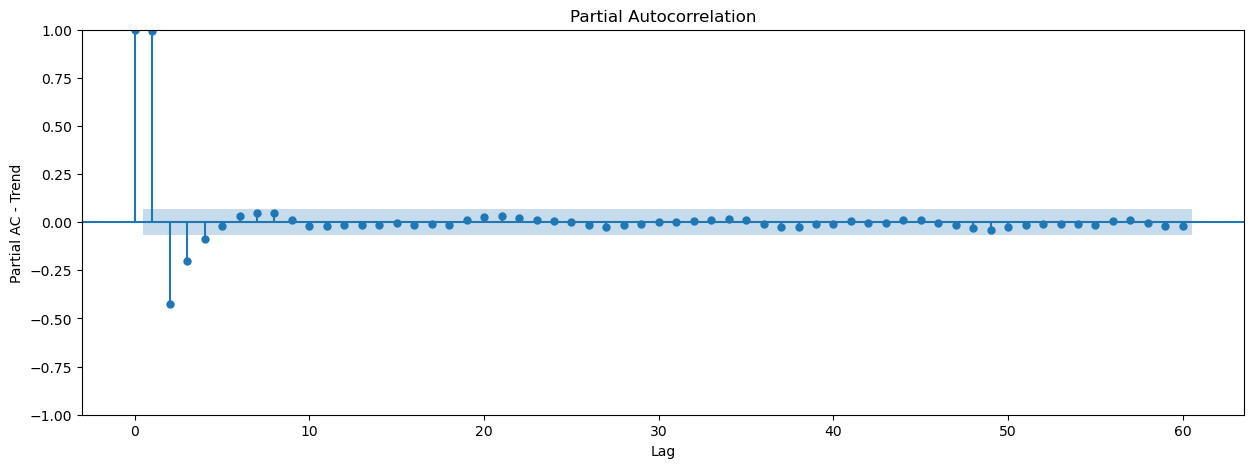

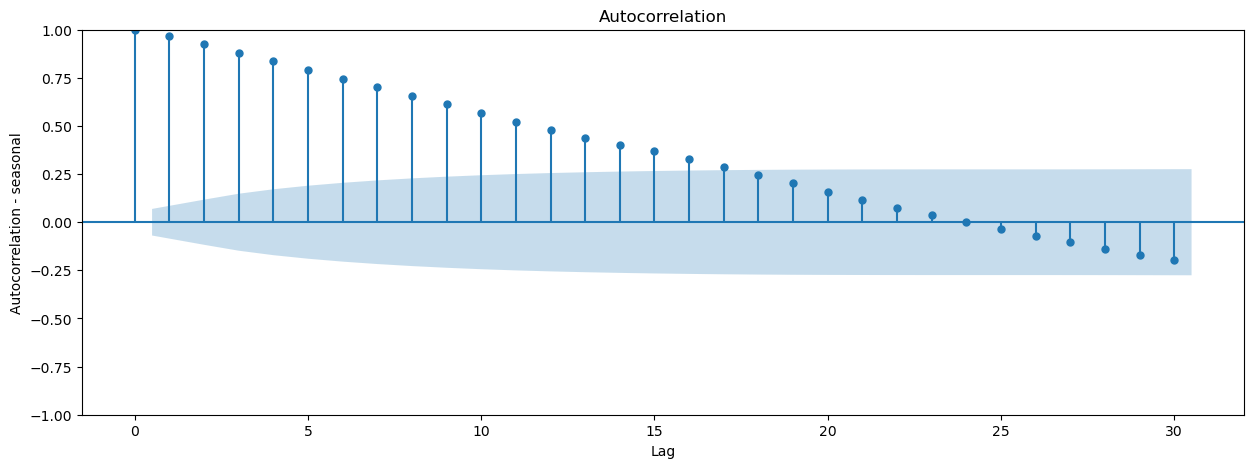

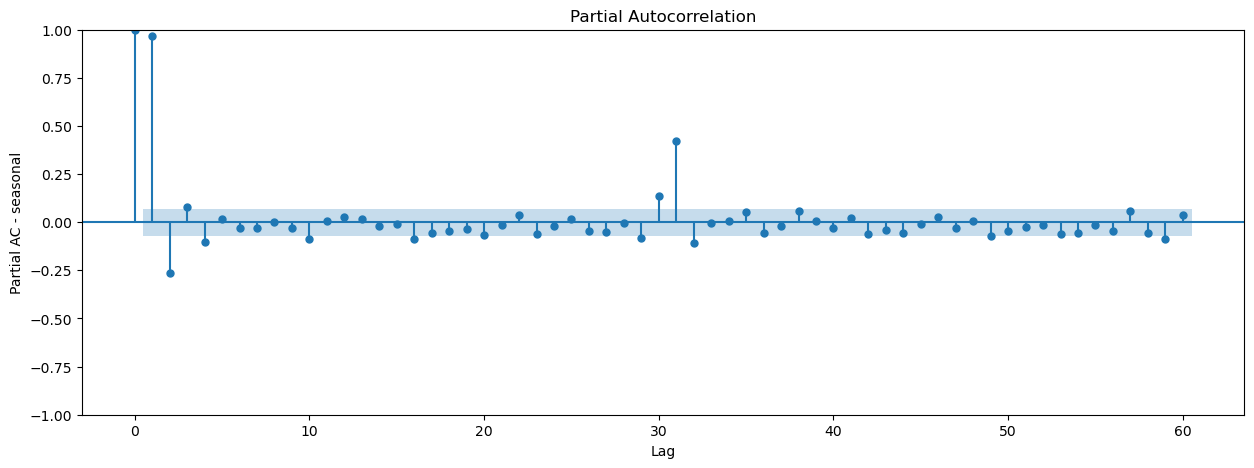

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Trend - ACF & PACF plots

plt.figure(figsize=(15, 5))
plot_acf(btc_daily["Trend"].dropna(), lags=200, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation - Trend')

plt.figure(figsize=(15, 5))
plot_pacf(btc_daily["Trend"].dropna(), lags=60, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial AC - Trend')

# Seasonal 

plt.figure(figsize=(15, 5))
plot_acf(btc_daily["seasonal_difference"].dropna(), lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation - seasonal')

plt.figure(figsize=(15, 5))
plot_pacf(btc_daily["seasonal_difference"].dropna(), lags=60, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial AC - seasonal')

plt.show()

We can see from the PACF that we have a significant peak at lag 1, which suggest an AR(1) process. Also, we have another peak at lag 2, suggesting a seasonal autoregressive process of order 1 (P = 1).

Looking at the ACF plot, we only see a significant peak at lag 1,2,3, suggesting a non-seasonal MA(1) process.

### Splitting the Series for Evaluation

Our main goal is to explore models which can reliably forecast future travel revenue. To get a fair evaluation of such models, we will use some of the available data for fitting the model and some for evaluating our forecast. This ensures that calculated metrics reflect the models performance on unseen, future data.  

For our case:
- we will use observations up until January 1, 1997 as the _training set_ to infer the model parameters, and
- subsequent records as _test data_ for evaluation. 

In [ ]:
# we drop the null values introduced at differencing
#btc_daily["seasonal_difference1"] = btc_daily["Close"].diff(30)

train = btc_daily.loc[(btc_daily.index <= "2022-11-01"), "seasonal_difference"].dropna()
test = btc_daily.loc[btc_daily.index > "2022-11-01", "seasonal_difference"]

#### The chart below will graph the seasonal difference in the trend!

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.update_layout(
    yaxis_title="Difference ($)", 
    xaxis_title="Date",
    title="Change in Close Price over Previous Day"
)
fig.show()

### Baseline Forecasts and Evaluation

There are a number of ways to make simple forecasts which can act as baselines for putting more complex models in context:
- for short-term forecasts, we can predict the last available value (or a rolling average of previous values);
- for long-term forecasts of stationary series, we can predict the mean over the training set;
- for non-stationary data, we can model the trend (e.g., using linear regression) to forecast future trend and add the seasonality to obtain a forecast for the whole series.

Since our differenced series is stationary, we will use the mean (over the training set) as our baseline.

- Stationary series: a time series that has stable/constant statistical properties (mean, variance, etc.) over time. Or in other words, the observations in such time series are not dependent on time. 

In [ ]:
full_index = pd.concat([train, test]).index
base_line = np.full(full_index.shape, np.mean(train))

predictions = pd.Series(data=base_line, index=full_index)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Mean Prediction"))

fig.update_layout(
    yaxis_title="Difference (billions)", 
    xaxis_title="Date",
    title="Change in Close Price over Previous Day"
)
fig.show()

#### MAE/ RMSE

As with any regression model, we can use the mean absolute error or root mean squared error to evaluate our models (or apply other use-case specific measure of performance).

The mean absolute error, or MAE, is calculated as the average of the forecast error values, where all of the forecast error values are forced to be positive. Forcing values to be positive is called making them absolute.

Both previous metrics are heavily influenced by the scale of the data. To put these numbers into perspective, we can look at what percentage (on average) our prediction is off by the original value. This metric is called the _mean absolute percentage error_ (MAPE) and going forward, we will use this metric to compare our models quantitatively.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 1.27%
Test MAPE on the difference: 1.02%


### Apply SARIMA which account for seasonality

The ACF and PCF gave a rough idea of processes , we want to test various  model that yeild the lowest AIC

Therefore, let’s write a function that will test a series of parameters for the SARIMA model and output a table with the best performing model at the top:
https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b

we will only test different values for the parameters p, P, q and Q. We know that both seasonal and non-seasonal integration parameters should be 1, and that the length of the season is 2. Therefore, we generate all possible parameters combination:


In [ ]:
### SOURCE: https://towardsdatascience.com/grid-search-for-sarimax-parameters-adbd5104cb8b 
# Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = range(0, 4, 1)
d = range(0,1)
q = range(0, 4, 1)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 365 in the 's' position as we have daily data
# You'll want to change this according to your time series' frequency
P = range(0, 2, 1)
D = range(0,1)
Q = range(0, 4, 1)


pdqs = [(x[0], x[1], x[2], 365) for x in list(itertools.product(P, D, Q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='D'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {} : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
# Run the code below to find the best pdq and PDQs combination
#sarimax_gridsearch(train, pdq, pdqs, freq='D')

The step above takes a lot of time so it is for reference only. We foudn by trial and error that by using the pdq = (2,0,0) the result is very good MAPE <1%. Thus, we will use the trial and error pdq 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(2, 0, 0), trend="c")
model_fit = model.fit(disp=0)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     seasonal_difference   No. Observations:                  766
Model:                SARIMAX(2, 0, 0)   Log Likelihood               -3205.907
Date:                 Sun, 11 Dec 2022   AIC                           6419.814
Time:                         19:49:03   BIC                           6438.378
Sample:                     09-27-2020   HQIC                          6426.960
                          - 11-01-2022                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5214      0.553     -0.943      0.346      -1.605       0.562
ar.L1          1.2322      0.026     46.826      0.000       1.181       1.284
ar.L2         -0.2710      0.028     -9.743      0.000      -0.326      -0.216
sigma2       251.8362      9.877     25.496      0.000     232.477     271.196
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                89.11
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.11
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

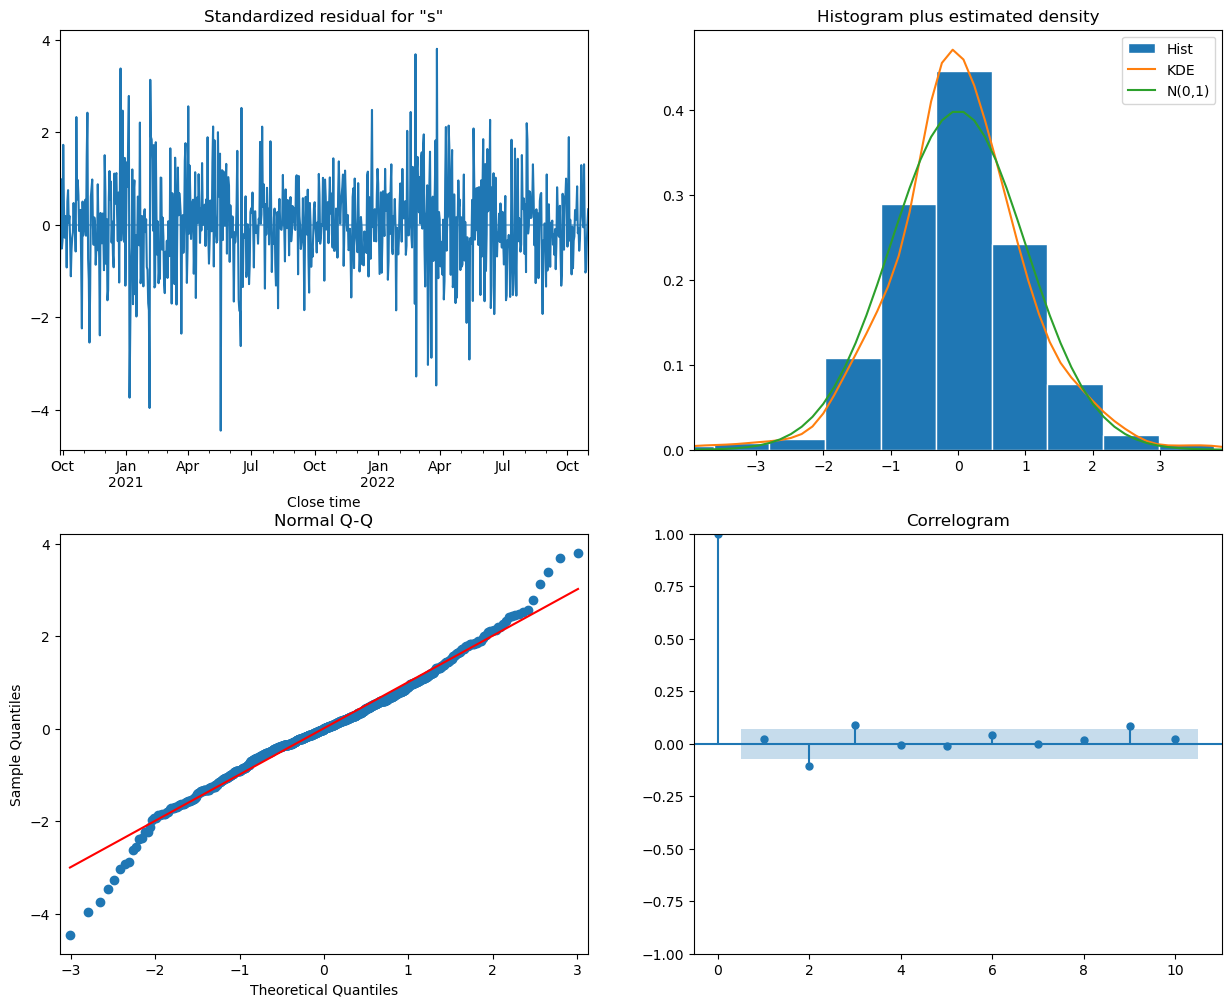

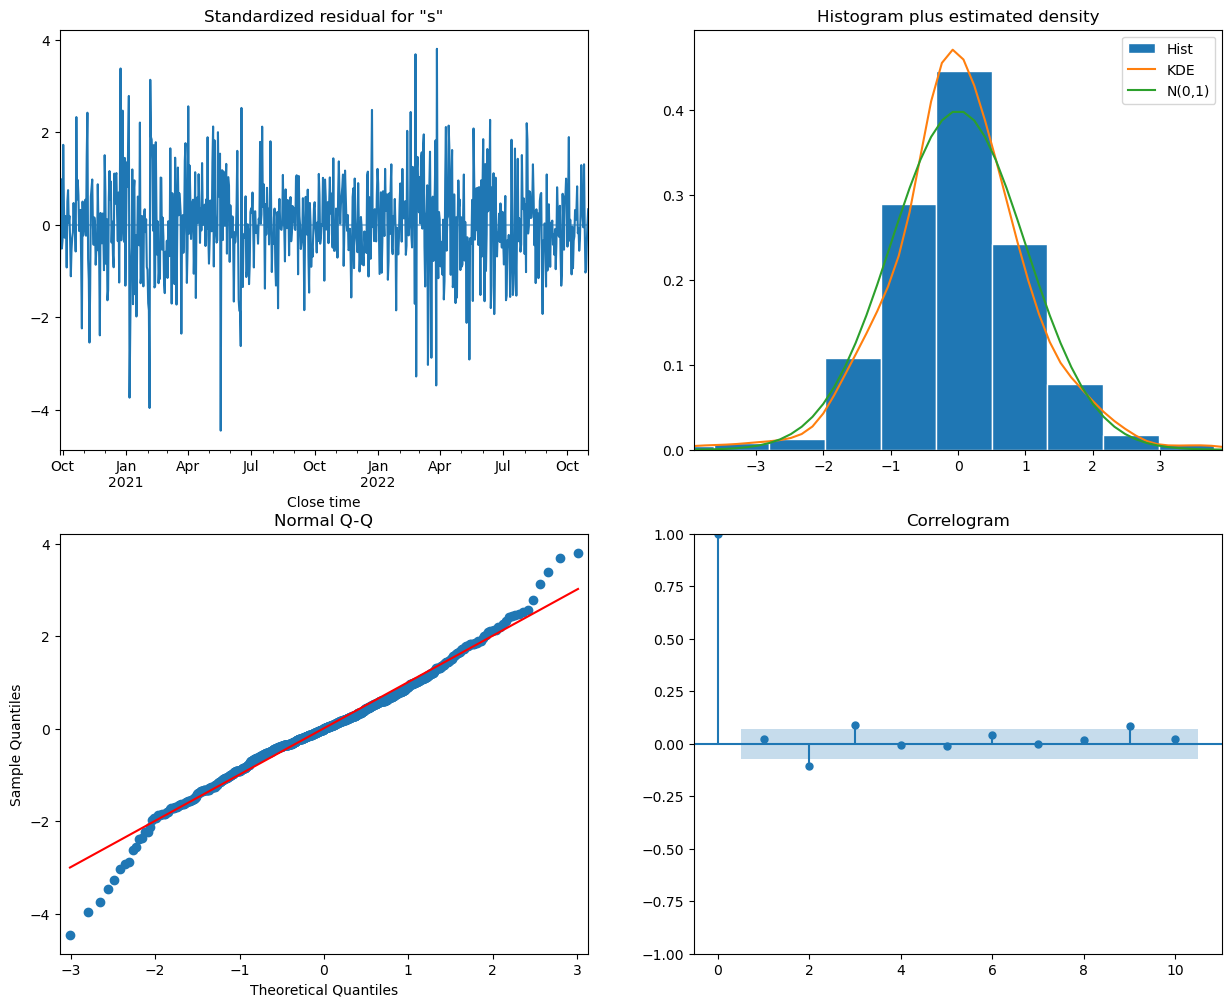

In [ ]:
model_fit.plot_diagnostics(figsize=(15,12))

From the normal Q-Q plot, we can see that we almost have a straight line, which suggest no systematic departure from normality. Also, the correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise.

We are ready to plot the predictions of our model and forecast into the future:

Once the model was fitted, we can make predictions using either the `predict` or `forecast` method. We specify the start and end index for the `predict` method, where index 0 corresponds to the first element of our train data set. The predictions will apply the AR formula to the lagged train values as long as they are available. After the last training time step, the forecasted values will be reused in the formula to make the next prediction. 

#### METHOD 1: using `predict`

In [ ]:
# Apply SARIMAX to the train and test sets
predictions = model_fit.predict(start=0, end=len(train)+len(test)-1)

# Predict the next 7 days from the train set
predictions[len(train):len(train)+7]

2022-11-02   -16.210813
2022-11-03   -15.697931
2022-11-04   -15.471767
2022-11-05   -15.332071
2022-11-06   -15.221223
2022-11-07   -15.122491
2022-11-08   -15.030869
Freq: D, Name: predicted_mean, dtype: float64

We see a similar picture, in the sense that our formula gives values that seem to follow the overall pattern in the data and captures the future trend better than the baseline prediction.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Predictions"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Difference ($)", 
    xaxis_title="Date",
    title="Change in Revenue Passenger Miles over Prior Year"
)
fig.show()

---


### Reconstructing the original series

We fitted the model on the seasonally differenced data, but how does our forecast translate to the original time series? In order to reconstruct the Revenue Passenger Miles from the seasonal difference, we start with the original 12 values and always looking back 12 months, we add the difference to get the next restored value.

<center>
<img src="https://drive.google.com/uc?export=view&id=1iEuzqm0y3nJz-ECjhVr_W2lHmLYMVEcr" width = 700/>
</center>


In [ ]:
# we slice out the first 30 days and the rest of the dates
first_year_indices = btc_daily.index[:30]
remaining_indices = btc_daily.index[30:]

# create an empty restored column
btc_daily["restored"] = np.nan

# fill in the first 30 original values into the empty restored column
btc_daily.loc[first_year_indices, "restored"] = \
    btc_daily.loc[first_year_indices, "Close"]

# use the current difference value and 30 days lagged restored value to get the next restored value
for current_date in remaining_indices:
    current_value = btc_daily.loc[current_date, "seasonal_difference"]
    year_before_restored = btc_daily.loc[current_date - pd.DateOffset(days=30), "restored"]
    
    btc_daily.loc[current_date, "restored"] = year_before_restored + current_value

# check agreement everywhere (rounding errors can come up so check closeness rather than strict equality)
np.allclose(btc_daily["Close"], btc_daily["restored"])

True

In [ ]:
# use the original train diff values and predicted test values
btc_daily.loc[train.index, "AR_difference"] = btc_daily.loc[train.index, "seasonal_difference"]
btc_daily.loc[test.index, "AR_difference"] = predictions[test.index]


# empty restored column
btc_daily["AR_restored"] = np.nan

# fill in the first 12 original values
btc_daily.loc[first_year_indices, "AR_restored"] = \
    btc_daily.loc[first_year_indices, "Close"]


# use the current difference and 12-month lagged restored value to get the next restored
for current_date in remaining_indices:
    current_value = btc_daily.loc[current_date, "AR_difference"]
    year_before_restored = btc_daily.loc[current_date - pd.DateOffset(days=30), "AR_restored"]
    
    btc_daily.loc[current_date, "AR_restored"] = year_before_restored + current_value



In [ ]:
# Sanity Check 
btc_daily.head()

,Close,Trend,Seasonal,Residual,seasonal_difference,restored,AR_difference,AR_restored
Close time,,,,,,,,
2020-08-28,1975.169091,NaN,-0.419473,NaN,NaN,1975.169091,NaN,1975.169091
2020-08-29,1971.633333,NaN,0.808258,NaN,NaN,1971.633333,NaN,1971.633333
2020-08-30,1972.790417,NaN,2.103251,NaN,NaN,1972.790417,NaN,1972.790417
2020-08-31,1974.850417,1969.956596,0.644114,4.249706,NaN,1974.850417,NaN,1974.850417
2020-09-01,1987.139583,1965.731548,-0.497707,21.905742,NaN,1987.139583,NaN,1987.139583


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=btc_daily.loc[train.index, "Close"], mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=btc_daily.loc[test.index, "Close"], mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=test.index, y=btc_daily.loc[test.index, "AR_restored"], mode='lines', name="AR prediction"))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title=" Close Price ($)", 
    xaxis_title="Date",
    title="Close Price over Prior Day"
)
fig.show()

This is exactly what we aimed to have: a model for forecasting into (and after) the disruption to air travel. Now, we could make future predictions past our current test set to make a long-term projection for the recovery of the revenue.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(btc_daily.loc[test.index, "Close"], btc_daily.loc[test.index, "AR_restored"])

print(f"MAPE on the Prediction/Test: {round(test_mape, 2)}%")

MAPE on the Prediction/Test: 0.06%


Comparing to the initial MAPE score, this is a significant improvement. MAPE score however increase if we try to predict more than 14 days.

---

### Facebook's Prophet

Facebook has their own time-series forecasting package called Prophet. This package is quite a bit more powerful than ARIMA in `statsmodels`, but we will explore its most basic functionality - further information can be found in the documentation [here](https://facebook.github.io/prophet/).

First, Prophet expects the data to be in a specific format: a dataframe with two columns, `ds` and `y` for the dates and observations. The `train` dataframe is the CHANGE in close price of the crypto. thus, once the fbprophet made the predictions, we need to re-construct the original series to the Price of Crypto

In [ ]:
# Check the train dataframe
train

Close time
2020-09-27   -103.127424
2020-09-28    -94.231250
2020-09-29    -73.106667
2020-09-30    -73.265000
2020-10-01    -76.451667
                 ...    
2022-10-28     13.708333
2022-10-29     -7.708333
2022-10-30    -19.958333
2022-10-31    -22.625000
2022-11-01    -17.708333
Freq: D, Name: seasonal_difference, Length: 766, dtype: float64

In [ ]:
# Load the library
from fbprophet import Prophet

# create the dataframe that satisfy FbProphet requirement: 2 columns, ds for time and y for target
prophet_train = train.reset_index()
prophet_train.rename(columns={"Close time": "ds", "seasonal_difference": "y"}, inplace=True)
prophet_train.head()

,ds,y
0,2020-09-27,-103.127424
1,2020-09-28,-94.231250
2,2020-09-29,-73.106667
3,2020-09-30,-73.265000
4,2020-10-01,-76.451667


Next, we fit the Prophet model with daily seasonality.

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(prophet_train)

c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



To predict in prophet, we actually have to provide an dataframe with a `ds` column. We can create one using `Prophet.make_future_dataframe`

In [ ]:
future = model.make_future_dataframe(periods=len(test), freq="D", include_history=False)
future

,ds
0,2022-11-02
1,2022-11-03
2,2022-11-04
3,2022-11-05
4,2022-11-06
5,2022-11-07
6,2022-11-08
7,2022-11-09
8,2022-11-10
9,2022-11-11


In [ ]:
# Notice we need to provide a dataframe for the predict method, it must also contain a `ds` column
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\ethai\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
0,2022-11-02,7.157423,-62.205802,82.070092
1,2022-11-03,11.231859,-62.348140,80.157332
2,2022-11-04,13.804655,-53.719156,88.928195
3,2022-11-05,14.626578,-55.192873,86.324080
4,2022-11-06,16.471934,-60.847802,86.160597


The forecast actually includes lower and upper confidence limits for our predictions. The Prophet library also includes useful visualization utilities built on top of plotly:

In [ ]:
# Load the plotly library for FBProphet
from fbprophet.plot import plot_plotly

# Add plot
fig = plot_plotly(model, forecast) # returns a plotly Figure object
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))

# Update the titles, and axis
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title=" Change in Close Price ($)", 
    xaxis_title="Date",
    title="CHANGE Close Price over Prior Day"
)

fig.show()

In [ ]:
# We set the index as the column 'ds' to re-construct the original series
forecast = forecast.set_index('ds')

In [ ]:
# Check 
forecast['yhat']

ds
2022-11-02     7.157423
2022-11-03    11.231859
2022-11-04    13.804655
2022-11-05    14.626578
2022-11-06    16.471934
2022-11-07    14.326182
2022-11-08    11.843092
2022-11-09    11.676289
2022-11-10    14.465263
2022-11-11    15.569864
2022-11-12    14.728485
2022-11-13    14.708486
2022-11-14    10.494563
2022-11-15     5.746499
2022-11-16     3.131136
2022-11-17     3.308611
2022-11-18     1.666878
2022-11-19    -2.020305
2022-11-20    -4.943370
2022-11-21   -12.069205
2022-11-22   -19.684247
2022-11-23   -25.063554
2022-11-24   -27.485780
2022-11-25   -31.500019
2022-11-26   -37.269300
2022-11-27   -41.922139
2022-11-28   -50.366418
2022-11-29   -58.834085
2022-11-30   -64.551796
2022-12-01   -66.757378
2022-12-02   -69.968045
2022-12-03   -74.325096
2022-12-04   -76.946475
2022-12-05   -82.741428
2022-12-06   -87.955728
2022-12-07   -89.842562
2022-12-08   -87.678953
2022-12-09   -86.033624
2022-12-10   -85.111065
Name: yhat, dtype: float64

In [ ]:
# use the original train diff values and predicted test values

btc_daily.loc[train.index, "FB_difference"] = btc_daily.loc[train.index, "seasonal_difference"]
btc_daily.loc[test.index, "FB_difference"] = forecast['yhat']

# empty restored column
btc_daily["FB_restored"] = np.nan

# fill in the first 12 original values
btc_daily.loc[first_year_indices, "FB_restored"] = \
    btc_daily.loc[first_year_indices, "Close"]


# use the current difference and 12-month lagged restored value to get the next restored
for current_date in remaining_indices:
    current_value = btc_daily.loc[current_date, "FB_difference"]
    year_before_restored = btc_daily.loc[current_date - pd.DateOffset(days=30), "FB_restored"]
    
    btc_daily.loc[current_date, "FB_restored"] = year_before_restored + current_value



In [ ]:
btc_daily


,Close,Trend,Seasonal,Residual,seasonal_difference,restored,AR_difference,AR_restored,FB_difference,FB_restored
Close time,,,,,,,,,,
2020-08-28,1975.169091,NaN,-0.419473,NaN,NaN,1975.169091,NaN,1975.169091,NaN,1975.169091
2020-08-29,1971.633333,NaN,0.808258,NaN,NaN,1971.633333,NaN,1971.633333,NaN,1971.633333
2020-08-30,1972.790417,NaN,2.103251,NaN,NaN,1972.790417,NaN,1972.790417,NaN,1972.790417
2020-08-31,1974.850417,1969.956596,0.644114,4.249706,NaN,1974.850417,NaN,1974.850417,NaN,1974.850417
2020-09-01,1987.139583,1965.731548,-0.497707,21.905742,NaN,1987.139583,NaN,1987.139583,NaN,1987.139583
...,...,...,...,...,...,...,...,...,...,...
2022-12-06,1777.125000,1785.422619,-0.497707,-7.799912,105.041667,1777.125000,-13.780120,1668.956990,-87.955728,1626.474539
2022-12-07,1779.583333,1786.607143,-2.039719,-4.984090,112.416667,1779.583333,-13.762144,1659.657032,-89.842562,1613.025286
2022-12-08,1786.333333,NaN,-0.598725,NaN,109.833333,1786.333333,-13.745144,1659.807320,-87.678953,1612.747472


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(btc_daily.loc[test.index, "Close"], btc_daily.loc[test.index, "FB_restored"])
test_mape1 = mean_absolute_percentage_error(btc_daily.loc[test.index, "Close"], btc_daily.loc[test.index, "AR_restored"])

print(f"MAPE on the Prediction/Test FB Prophet: {round(test_mape, 2)}%")
print(f"MAPE on the Prediction/Test AR: {round(test_mape1, 2)}%")


# Plot FBProphet & AR, we will not plot the upper or lower bounds
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=btc_daily.loc[train.index, "Close"], mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=btc_daily.loc[test.index, "Close"], mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=test.index, y=btc_daily.loc[test.index, "FB_restored"], mode='lines', name="FBProphet"))
fig.add_trace(go.Scatter(x=test.index, y=btc_daily.loc[test.index, "AR_restored"], mode='lines', name="SARIMA"))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title=" Close Price ($)", 
    xaxis_title="Date",
    title=f"Daily Price Prediction: PAXGUSDT - Group 1  <br><sup>MAPE (Errors): FBProphet: {round(test_mape, 2)}%, SARIMA: {round(test_mape1, 2)}%</sup>",

)


fig.update_xaxes(tickangle=10)
fig.update_yaxes(title_font=dict(size=30, family="Arial Black"), tickfont_family="Arial Black")
fig.update_xaxes(title_font=dict(size=30, family="Arial Black"), tickfont_family="Arial Black")
fig.update_layout(title_font_family="Arial Black", title_font_size=45)
fig.update_layout(legend_font_family="Arial Black", legend_font_size=30)

fig.update_layout(
        hoverlabel=dict(
            font_size=30,
            font_family="Rockwell"
        )
    )

 # Use this code to save the chart as html file
fig.write_html("Daily Price Prediction PAXGUSDT - Group 1.html",
                full_html=True,
                include_plotlyjs='cdn')

fig.show()

MAPE on the Prediction/Test FB Prophet: 0.07%
MAPE on the Prediction/Test AR: 0.06%


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(btc_daily.loc[test.index, "Close"], btc_daily.loc[test.index, "FB_restored"])
test_mape1 = mean_absolute_percentage_error(btc_daily.loc[test.index, "Close"], btc_daily.loc[test.index, "AR_restored"])

print(f"MAPE on the Prediction/Test FB Prophet: {round(test_mape, 2)}%")
print(f"MAPE on the Prediction/Test AR: {round(test_mape1, 2)}%")

MAPE on the Prediction/Test FB Prophet: 0.07%
MAPE on the Prediction/Test AR: 0.06%
